In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [9]:
df = pd.read_csv('./amz_uk_price_prediction_dataset.csv')
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [10]:
# Part 1: Understanding Product Categories
# Business Question: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

# #1. Frequency Tables:
# #Generate a frequency table for the product category.
frequency_table = df['category'].value_counts()
frequency_table

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Alexa Built-In Devices                       107
Motorbike Chassis                            107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64

In [11]:
#Which are the top 5 most listed product categories?
top5 = frequency_table.head(5)
top5

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

<Axes: xlabel='category'>

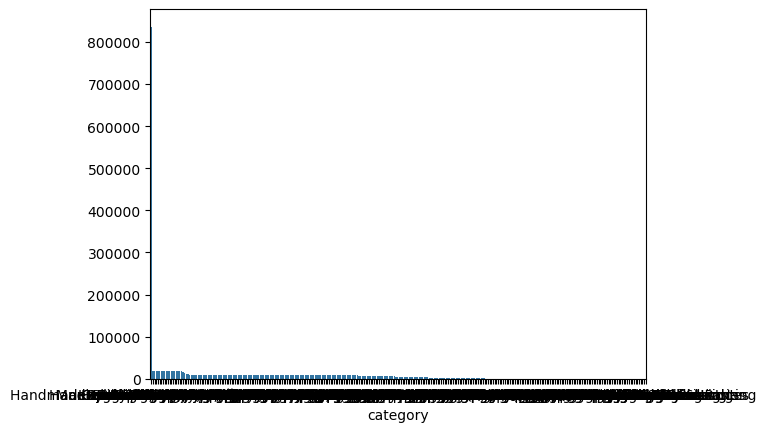

In [12]:
#Visualizations:

#Display the distribution of products across different categories using a bar chart. If you face problems understanding the chart, do it for a subset of 
# top categories.
sns.barplot(x=frequency_table.index, y=frequency_table.values)

C:\Users\ruben\AppData\Local\Temp\ipykernel_13672\199088415.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top5.index, y=top5.values, palette="viridis")


<Axes: xlabel='category'>

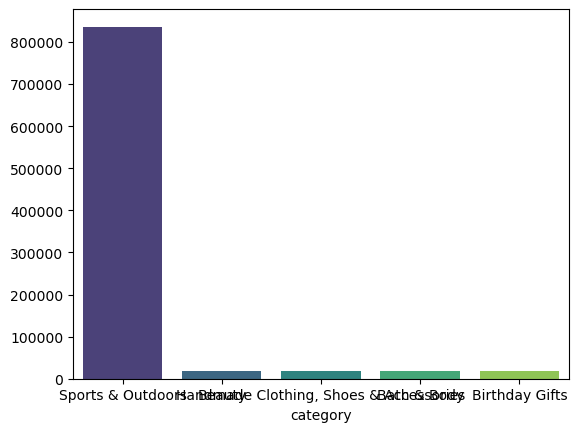

In [13]:
sns.barplot(x=top5.index, y=top5.values, palette="viridis")


<Axes: ylabel='count'>

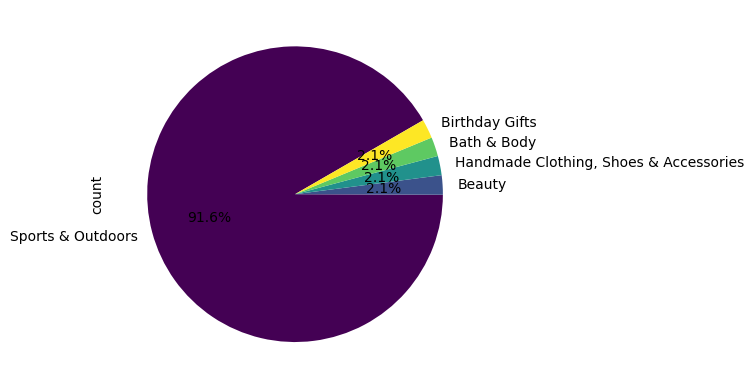

In [ ]:
#For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?
top5.plot(kind="pie", autopct="%1.1f%%", cmap="viridis", startangle=30)

In [17]:
# Part 2: Delving into Product Pricing
# Business Question: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

# Measures of Centrality:
# Calculate the mean, median, and mode for the price of products.
mean_price = df['price'].mean()
median_price = df['price'].median()
mode_price = df['price'].mode()[0]
print(f"Mean: {mean_price}, Median: {median_price}, Mode: {mode_price}")

Mean: 89.24380943923663, Median: 19.09, Mode: 9.99


In [18]:
# Measures of Dispersion:

# Determine the variance, standard deviation, range, and interquartile range for product price.
# How varied are the product prices? Are there any indicators of a significant spread in prices?

variance_price = df['price'].var()
std_dev_price = df['price'].std()
range_price = df['price'].max() - df['price'].min()
iqr_price = df['price'].quantile(0.75) - df['price'].quantile(0.25)
print(f"variance: {variance_price}, standard deviation: {std_dev_price}, range: {range_price}, IQR: {iqr_price}")

variance: 119445.48532256528, standard deviation: 345.60886175352226, range: 100000.0, IQR: 36.0


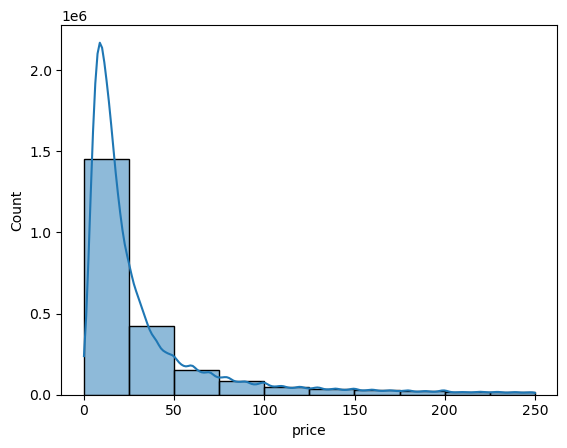

In [25]:
# Visualizations:

# Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. If its hard to read these diagrams, think why this is, and explain how it could be solved..
# Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing.

df_filtered = df[df['price'] < 250]
sns.histplot(df_filtered['price'], bins=10, kde=True)
plt.show()

<Axes: ylabel='price'>

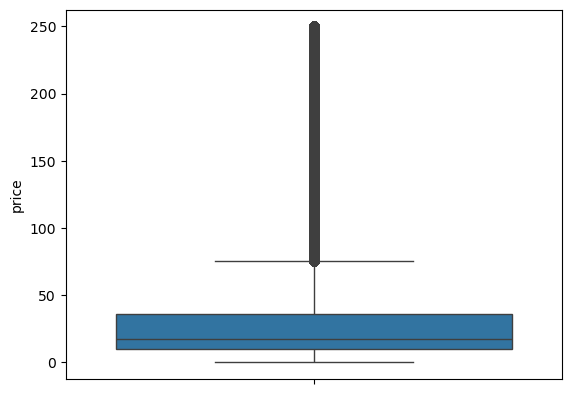

In [28]:
sns.boxplot(y=df_filtered['price'])


In [ ]:
# Part 3: Unpacking Product Ratings
# Business Question: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

# Measures of Centrality:

# Calculate the mean, median, and mode for the rating of products.
# How do customers generally rate products? Is there a common trend?

mean_stars = df['stars'].mean()
median_stars = df['stars'].median()
mode_stars = df['stars'].mode()[0]
print(f"Mean: {mean_stars}, Median: {median_stars}, Mode: {mode_stars}")

Mean: 2.152836472966065, Median: 0.0, Mode: 0.0


In [33]:
# Measures of Dispersion:

# Determine the variance, standard deviation, and interquartile range for product rating.
# Are the ratings consistent, or is there a wide variation in customer feedback?

variance_stars = df['stars'].var()
std_dev_stars = df['stars'].std()
iqr_stars = df['stars'].quantile(0.75) - df['stars'].quantile(0.25)
print(f"variance: {variance_stars}, standard deviation: {std_dev_stars}, IQR: {iqr_stars}")

variance: 4.81743402976196, standard deviation: 2.1948653785054697, IQR: 4.4


In [ ]:
# Shape of the Distribution:

# Calculate the skewness and kurtosis for the rating column.
# Are the ratings normally distributed, or do they lean towards higher or lower values?

skewness_stars = df['stars'].skew()
kurtosis_stars = df['stars'].kurt()
print(f"Skewness: {skewness_stars}, Kurtosis: {kurtosis_stars}")

Skewness: 0.08120735761080985, Kurtosis: -1.9260061280432985


<Axes: xlabel='stars', ylabel='Count'>

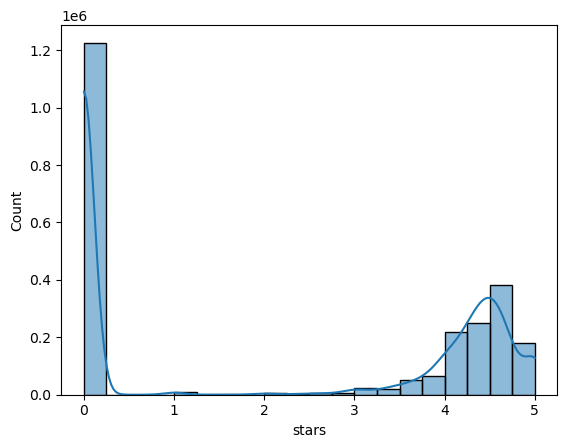

In [34]:
# Visualizations:

# Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

sns.histplot(df['stars'], bins=20, kde=True)